<a href="https://colab.research.google.com/github/SuvOnGithub/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

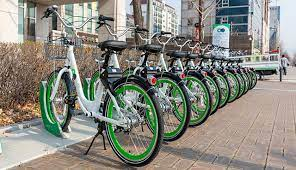

Rental Bike Sharing is the process by which bicycles are procured on several basis- hourly, weekly,membership-wise, etc. This phenomenon has seen its stockrise to considerable levels due to a global effort towards reducing the carbon footprint, leading to climate change,unprecedented natural disasters, ozone layer depletion,and other environmental anomalies.

In my project, I chose to analyse a dataset pertaining to Rental Bike Demand from South Koreancity of Seoul, comprising of climatic variables like Temperature, Humidity, Rainfall, Snowfall, Dew Point Temperature, and others. For the available raw data,firstly, a through pre-processing was done after which a Here, hourly rental bike count is the regress.


Bike sharing systems allow the users to take one way bicycle trips over short distances.Generally these systems are operated via automated kiosks to save manpower and reduce waiting time for the users. Bike Sharing System ensures that pollution is reduced as with use of bicycles there is reduction in use of motor vehicles which leads to reduction in emission of pollutants in the air. This practice of Bike Sharing Systems is common in Western Countries while the same is not seen yet in countries like India.In India most of the bike sharing systems could not achieve their maximum potential as data analysis was not used properly. The advantages of this system is that we can have public bike stations without any human involvement. Even local Chennai Municipal Corporation has invited biddings for a new bicycle sharing system.

Generally in bicycle sharing systems it is very important that the administrators should know how many cycles will be needed in each bicycle station, knowing this count enables them the arrange proper number of cycles at the stations and decide whether a particular station needs to have extra number of bicycle stands.So in this research work we study various prediction algorithms i.e. linear regression, decision trees, gradient boosting machines. This research work focuses on which algorithm can work better for the real world problem of bicycle sharing demand prediction.

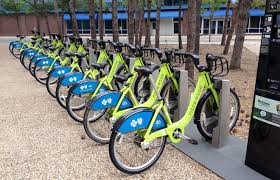

##**Business Goal:**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [ ]:
#import required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
# import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing file and converting it into dataframe
file='/content/drive/MyDrive/alma better/SeoulBikeData.csv'
csv=pd.read_csv(file,encoding='ISO-8859-1')
df=pd.DataFrame(csv)

In [ ]:
df.head()#getting first 5 rows of dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()#getting last 5 rows of dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape#getting shape of data

(8760, 14)

In [ ]:
df.describe(include='all')#getting summary


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
#check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#finding null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**OBSERVATION:** There is no null values present in the dataset.

In [ ]:
#getting summary
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#converting the date column into year, day, month, weekday column. 
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month']= pd.DatetimeIndex(df['Date']).month
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [ ]:
df.shape

(8760, 18)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [ ]:
display(df['weekday'].unique())#getting unique values of week

array([3, 6, 2, 4, 0, 5, 1])

Weekday is in range 0-6 so we need to make it in normal 1-7.

In [ ]:
#previously weekday values was in 0-6 now we are converting it into 1-7 format
df['weekday'] = np.array(df['weekday'])+1
display(df['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

##Exploratory Data Analysis (EDA)

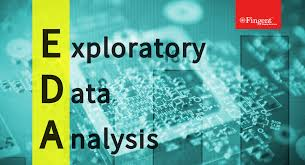

Exploratory data analysis is an statistical way of understanding the data which is usually done in a visual way.The graphs plotted in explotary data analysis are for better understanding of data to the analyst.

Since we have to predict the number of bikes that will be rented, the best way to begin is with the variable to predict, "Rented Bike Count"

##**Demand of rented bikes at different times of years**

In [ ]:
#creating data frame with year, month, day, weekday and rented bike count
Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)

RENTED BIKE COUNT PER YEAR

In [ ]:
Rented_bike_per_year


,Year,Rented Bike Count
0,2017,185330
1,2018,5986984


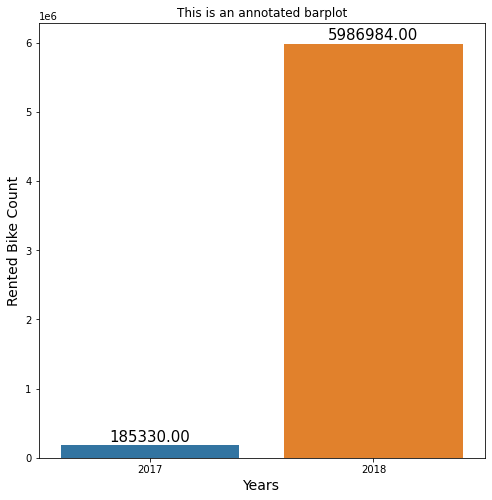

In [ ]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_year['Year'] , y=Rented_bike_per_year['Rented Bike Count'])
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 

 
# Setting the label for x-axis
plt.xlabel("Years", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see in year 2018 the rented bike count was 5986984 which is greater than 2017. It is because this business was started in 2017 and after one year business got accelerated.

RENTED BIKE COUNT PER MONTH

In [ ]:
Rented_bike_per_month

,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


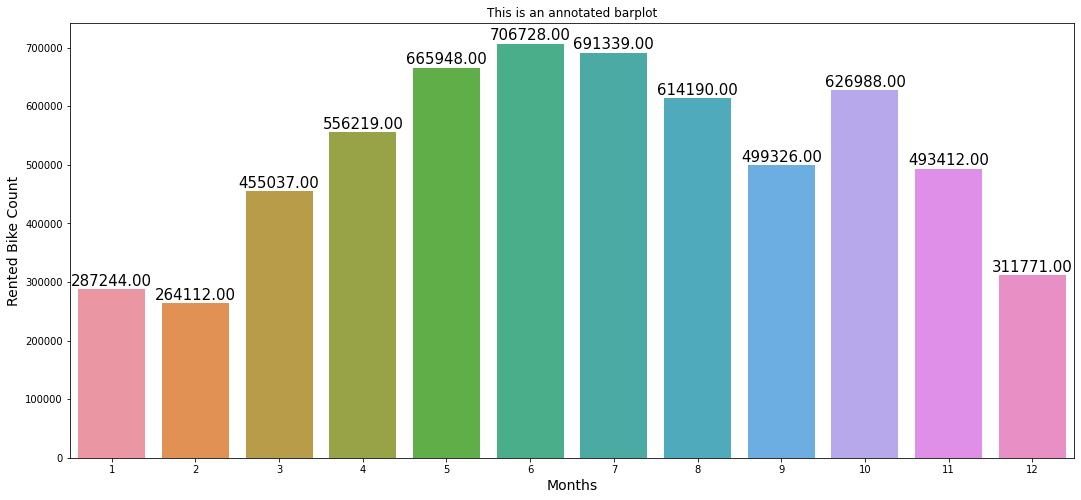

In [ ]:
# Defining the plot size
plt.figure(figsize=(18, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_month['Month'] , y=Rented_bike_per_month['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Months", size=14)

 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see in 6th month or in june the rented bike count is 706728 which is highest and in 2nd month or in feb the count was lowest which is 264112.

RENTED BIKE COUNT PER DAY

In [ ]:
Rented_bike_per_Day

,Day,Rented Bike Count
0,1,64062
1,2,53694
2,3,117813
3,4,170431
4,5,235021
5,6,371295
6,7,272954
7,8,247818
8,9,335006
9,10,210966


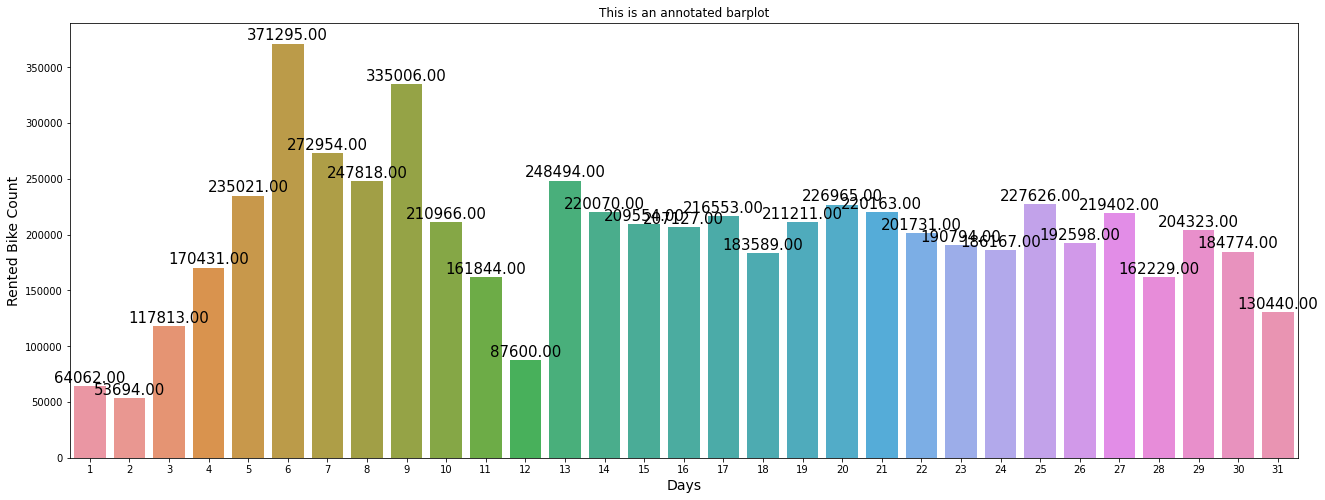

In [ ]:
# Defining the plot size
plt.figure(figsize=(22, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Day['Day'] , y=Rented_bike_per_Day['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Days", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see the rented bike count is highest on 6th day of the month which is 371295 and lowest on 2nd day of the month which is 53694.

RENTED BIKE COUNT PER WEEKDAY

In [ ]:
Rented_bike_per_Weekday

,weekday,Rented Bike Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


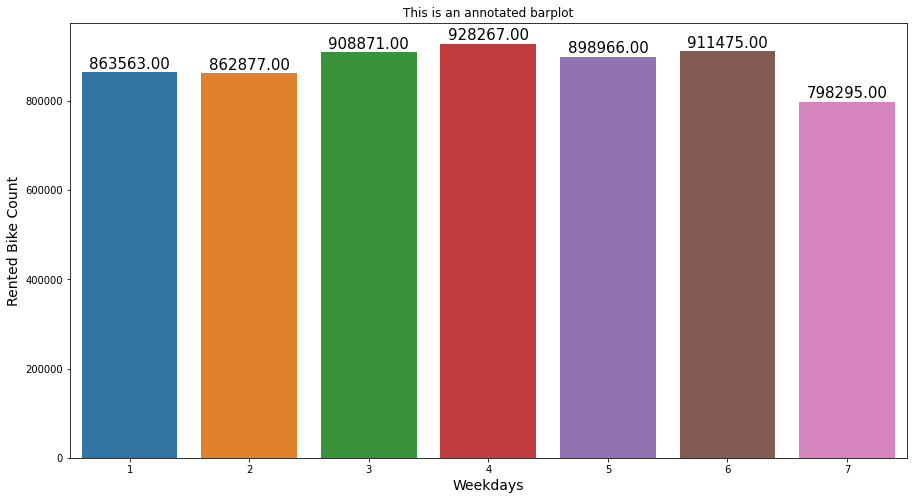

In [ ]:
# Defining the plot size
plt.figure(figsize=(15, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Weekday['weekday'] , y=Rented_bike_per_Weekday['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Weekdays", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see on 4th day of week the rented bike count is 928267 which is highest.

RENTED BIKE COUNT WITH RESPECT TO TEMPERATURE

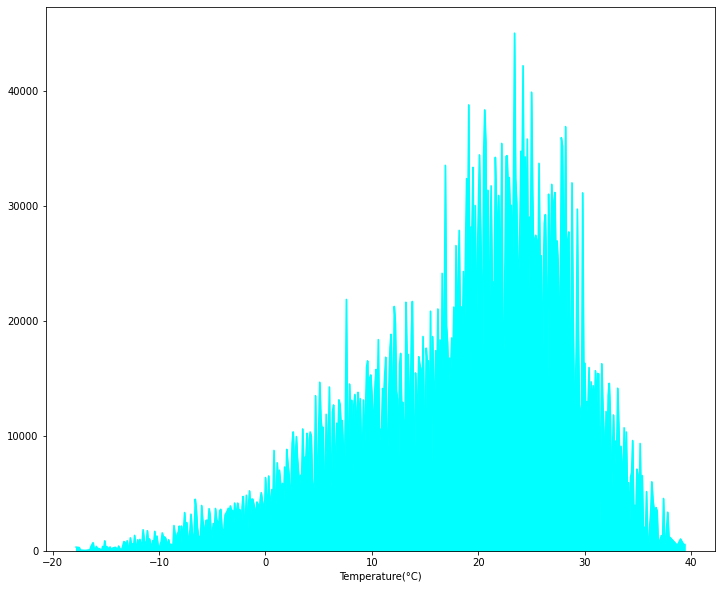

In [ ]:
 # Plot the graph between the temperature and rented bike counts
temp=df.groupby('Temperature(°C)')['Rented Bike Count'].sum()
temp.plot.area(color='cyan',figsize=(12, 10))

 **Observation:** 
 
*  From the graph, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.
*   From the above graph, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.

MONTHS OF BOTH YEAR 2017 AND 2018 AND RENTED BIKE COUNT

In [ ]:
 #creating dataframe with months of both year 2017 and 2018 and rented bike count
df.groupby(['Year','Month']).agg({'Rented Bike Count':['sum']}).reset_index()

,Year,Month,Rented Bike Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


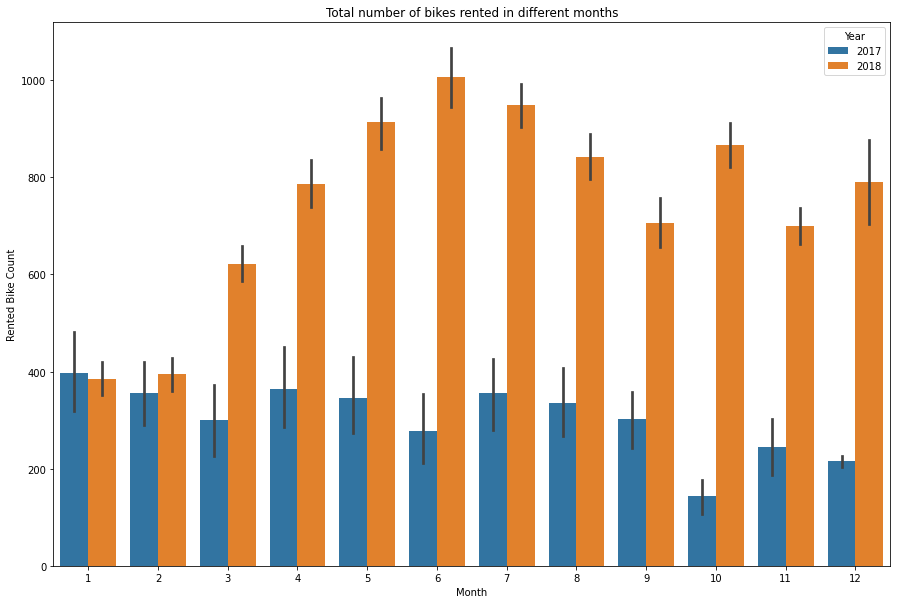

In [ ]:
 #plotting graph
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data =df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()

 **OBSERVATION:** 
1.   There's is a whooping increase in number of bike rents in year 2018.
2.    In the last month the demand decreases in 2018 but increases in it seen to be increasing in the end of 2017.
3.    It is like this because, in 2017 the demand is taking off and we can see the pattern as it is still inceasing in the beginning months of 2018.
4.    There is a decline in the end of the year. This could be repercussions of winter season as well.

In [ ]:
  df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


In [ ]:
 #extracting unique seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
 #adding temperature and dew point temperature column 
df['Temperature_and_DP_Temp'] = [df['Temperature(°C)'][i]+df['Dew point temperature(°C)'][i] for i in range(len(df))]
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

RENTED BIKE COUNT PER SEASON

In [ ]:
 #seasons and Rented Bike Count
df.groupby(['Seasons'])['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

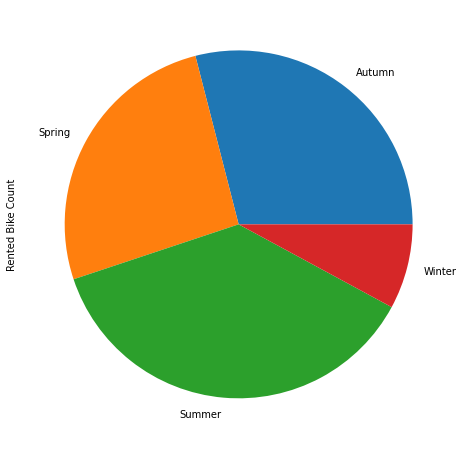

In [ ]:
#plotting pie 
df.groupby('Seasons')['Rented Bike Count'].sum().plot.pie(figsize=(15,8))

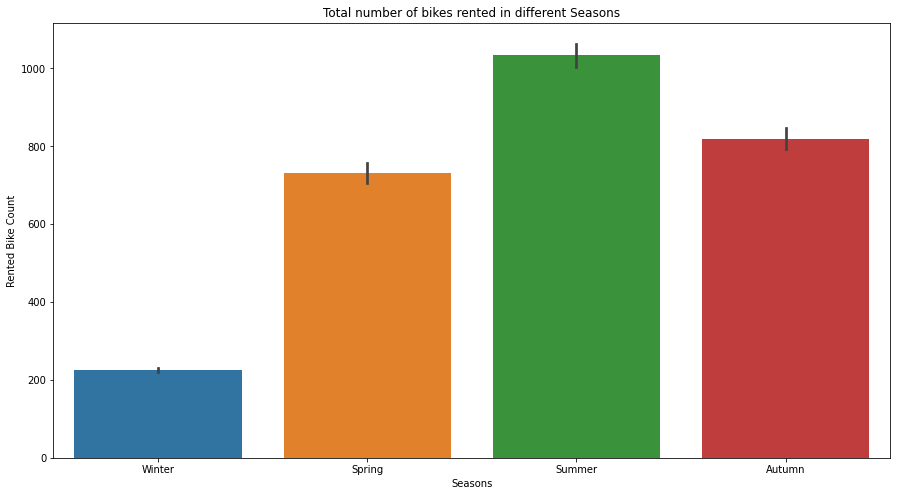

In [ ]:
 #plotting graph
plt.figure(figsize=(15,8))
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.title("Total number of bikes rented in different Seasons")
plt.show()

 **OBSERVATION:** Here with pie and bar plot we can say in summer the rented bike count was high as compared to other seasons and lowest in winter season. This is because when temperature decreases amount of snowfall increases due to which people avoid getting out that is the reason in summer rented bike count increases.

RENTED BIKE COUNT ON HOLIDAY AND ON NO HOLIDAY

In [ ]:
 #creating dataframe with holiday and rented bike count
holiday_bike_count=pd.DataFrame(df.groupby('Holiday')['Rented Bike Count'].sum()).reset_index()

In [ ]:
 holiday_bike_count

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


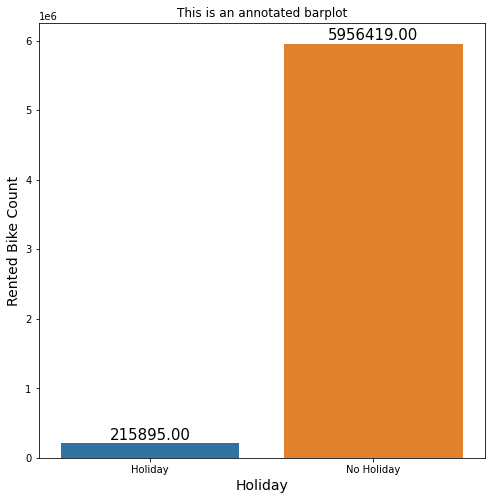

In [ ]:
 # Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=holiday_bike_count['Holiday'] , y=holiday_bike_count['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Holiday", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

##Or we can do the same with:

In [ ]:
 #importing library
from plotnine import*

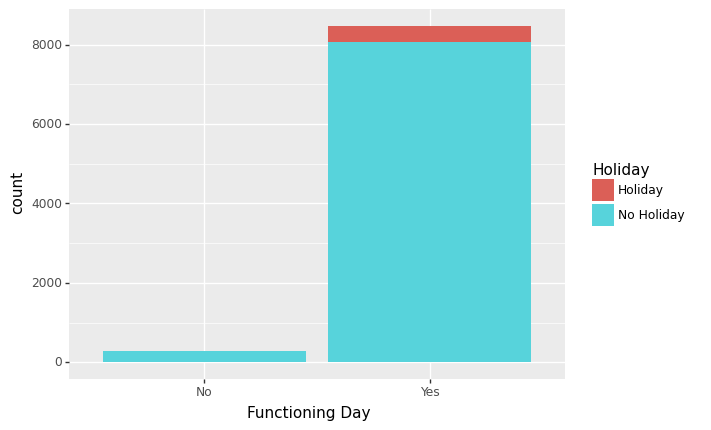

<ggplot: (8758911559457)>

In [ ]:
 #plotting graph
ggplot(df)+ aes('Functioning Day',fill='Holiday')+geom_bar()

 **OBSERVATION:** 
*   Here's an ironic insight, all the holidays are falling on the functioning Days.
 
*   Here we can say on no holiday the rented bike count is much more high than on holiday.

RENTED BIKE COUNT PER HOUR

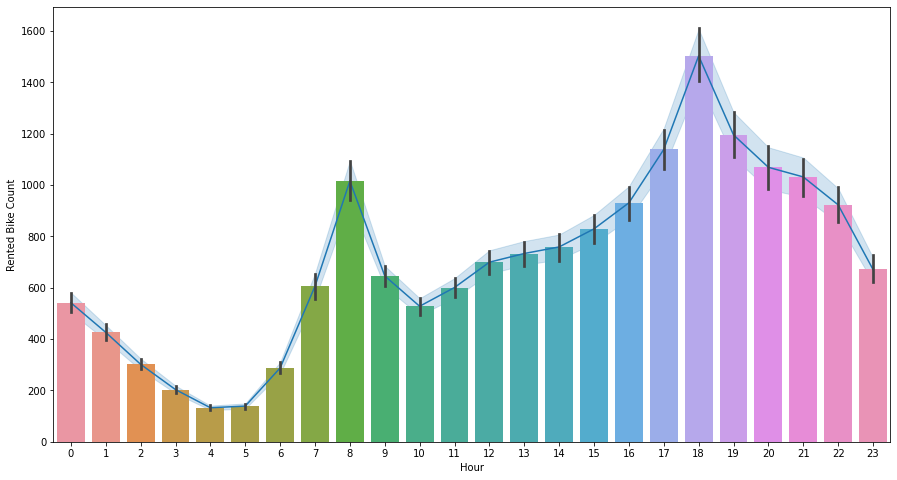

In [ ]:
 #plotting graph
plt.figure(figsize=(15,8))
sns.lineplot(df['Hour'],df['Rented Bike Count'])
sns.barplot(df['Hour'],df['Rented Bike Count'])

 **OBSERVATION:**  Here with the graph we can say on 18th hour of the day there is a huge spike in the count of rented bike which is approx. 1600.

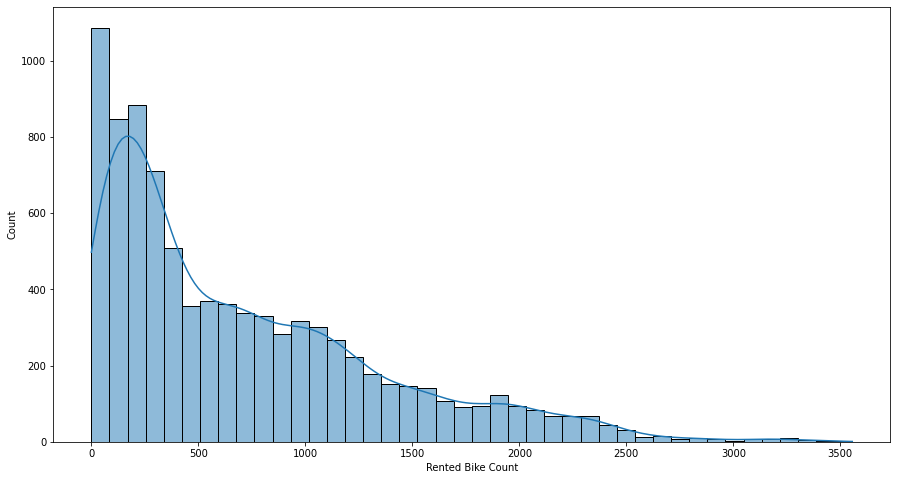

In [ ]:
 import seaborn as sns
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=df, x="Rented Bike Count", kde= True,ax=ax)
plt.show()

**OBSERVATION:**


  
 
*   The data is positively skewed

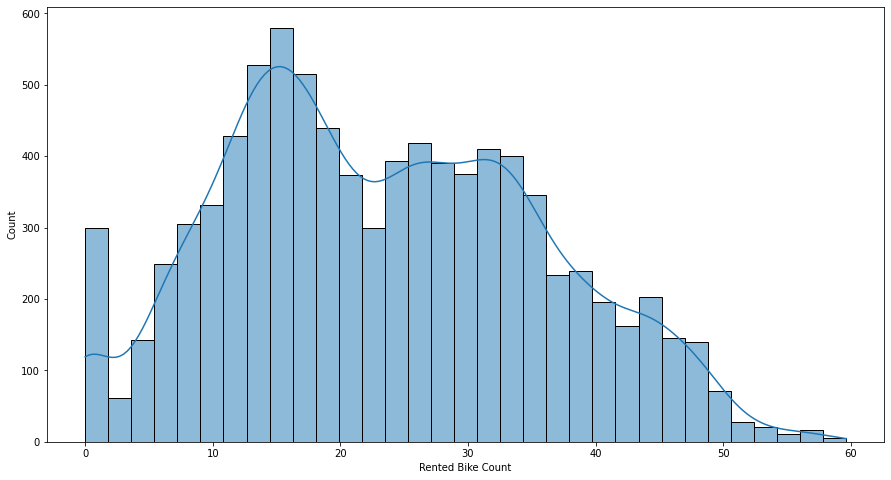

In [ ]:
 import seaborn as sns
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=df, x=np.sqrt(df["Rented Bike Count"]), kde= True,ax=ax)
plt.show()

   **Observation:**
*   After squar root transformation it is looking bit normal.

FINDING CORRELATION

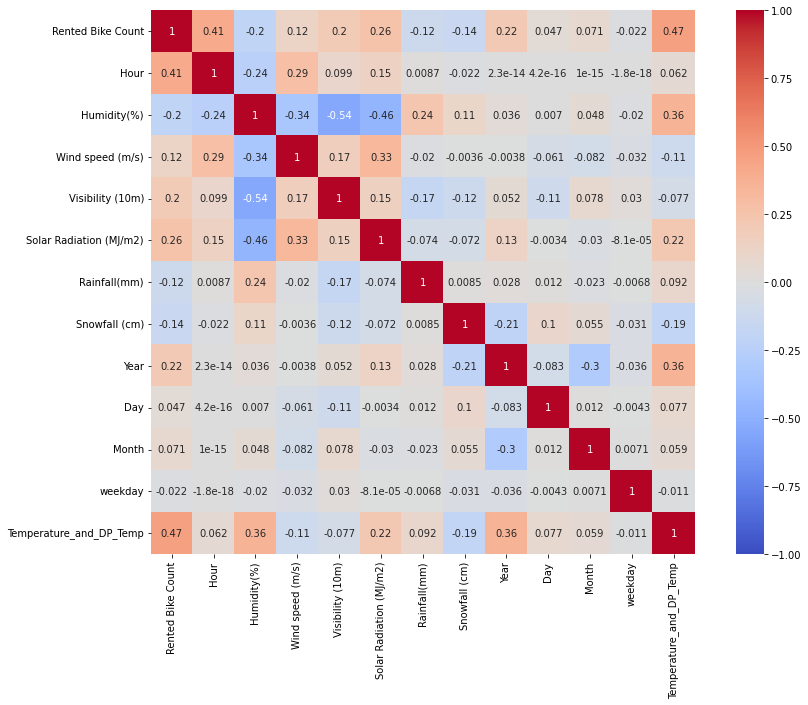

In [ ]:
 #plotting graph
plt.figure(figsize=(15,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

 **OBSERVATION:** 
*   Temperature and Dew point temperature are highly correlated. We can add them to make one single column

##Pre-Processing 

There is a need of data pre-processing because the data
may be incomplete or inconsistent or noisy. There are
many ways to deal with un-processed data viz:

i)Data Cleaning: By this term we mean to fill the missing
values in data, identifying and removing outliers in data,
smoothningdata.

ii)Data Transformation: In this stage operations like
normalization and aggrigation are performed.

iii)Data Reduction: In this stage the data set is modified
such that the results produced by the model are almost the
same but un neccesary values in dataset are removed.

iv)Data Integration: In this stage data is merged from
different sources if needed , again redundancies are
removed too.

v)Label Encoding: converting the categorical variables into numerical.

##**Label Encoding**

We will create DUMMY variables for 3 categorical variables 'Holiday', 'Functioning Day' and 'Seasons'.

Before creating dummy variables, we will have to convert them into 'category' data types.

In [ ]:
#replacing no with 0 and yes with 1 and holiday with 1 no holiday with 0
bike_df = df.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0})

In [ ]:
#creating dummy varaible for seasons
season_dummy = pd.get_dummies(bike_df['Seasons'])
for i in season_dummy.columns:
  bike_df[i]= season_dummy[i]
bike_df.drop('Seasons',axis='columns',inplace=True)
bike_df.head()

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,Temperature_and_DP_Temp,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,4,-22.8,0,0,0,1
1,2017-01-12,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,4,-23.1,0,0,0,1
2,2017-01-12,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,4,-23.7,0,0,0,1
3,2017-01-12,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,2017,12,1,4,-23.8,0,0,0,1
4,2017-01-12,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,2017,12,1,4,-24.6,0,0,0,1


In [ ]:
# dropping date column as it is not required
bike_df.drop('Date', axis = 1 ,inplace= True)

In [ ]:
#replacing month no. with mnth name
bike_df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec'),inplace= True)

In [ ]:
#creating dummy varaible for month
month_dummy = pd.get_dummies(bike_df['Month'])
for i in month_dummy.columns:
  bike_df[i]= month_dummy[i]
bike_df.drop('Month',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
bike_df.shape

(8760, 30)

In [ ]:
bike_df['Holiday'].value_counts()#getting value count of holidays and no holiday

0    8328
1     432
Name: Holiday, dtype: int64

In [ ]:
#creating dummy varaible for Holiday
Holiday_dummy = pd.get_dummies(bike_df['Holiday'])
for i in Holiday_dummy.columns:
  bike_df[i]= Holiday_dummy[i]
bike_df.drop('Holiday',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Year,...,jan,july,june,mar,may,nov,oct,sept,0,1
0,254,0,37,2.2,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
1,204,1,38,0.8,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
2,173,2,39,1.0,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
3,107,3,40,0.9,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
4,78,4,36,2.3,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
bike_df['Functioning Day'].value_counts()#getting value count of functioning day

1    8465
0     295
Name: Functioning Day, dtype: int64

In [ ]:
#creating dummy varaible for Holiday
Functioning_Day_dummy = pd.get_dummies(bike_df['Functioning Day'])
for i in Functioning_Day_dummy.columns:
  bike_df[i]= Functioning_Day_dummy[i]
bike_df.drop('Functioning Day',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Day,...,jan,july,june,mar,may,nov,oct,sept,0,1
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
bike_df.shape# final shape of dataframe after preprocessing

(8760, 30)

##Model Building

In [ ]:
 #spliting independent and dependent variable
x = bike_df.drop('Rented Bike Count',axis=1)
y = bike_df['Rented Bike Count']
x.head()

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Day,weekday,...,jan,july,june,mar,may,nov,oct,sept,0,1
0,0,37,2.2,2000,0.0,0.0,0.0,2017,12,4,...,1,0,0,0,0,0,0,0,0,1
1,1,38,0.8,2000,0.0,0.0,0.0,2017,12,4,...,1,0,0,0,0,0,0,0,0,1
2,2,39,1.0,2000,0.0,0.0,0.0,2017,12,4,...,1,0,0,0,0,0,0,0,0,1
3,3,40,0.9,2000,0.0,0.0,0.0,2017,12,4,...,1,0,0,0,0,0,0,0,0,1
4,4,36,2.3,2000,0.0,0.0,0.0,2017,12,4,...,1,0,0,0,0,0,0,0,0,1


##Train Test split model

 Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (80:20 ratio)We will use train_test_split method from sklearn package for this.

In [ ]:
 # spliting the model into test and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 29)
(7008,)
(1752, 29)
(1752,)


 **OBSERVATION:** 
*   We have only 7008 rows of data in our training dataset. We can compromise with our gredient descent to take little longer to reach the global minima. This is why we aren't scaling this particular dataset.

In [ ]:
 
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
def calc_vif(X):
 
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)

In [ ]:
 #calculating vif for all the variables
calc_vif(x)

,variables,VIF
0,Hour,1.214640
1,Humidity(%),3.215531
2,Wind speed (m/s),1.316532
3,Visibility (10m),1.898088
4,Solar Radiation (MJ/m2),1.930112
5,Rainfall(mm),1.080121
6,Snowfall (cm),1.159812
7,Year,2.327192
8,Day,1.102325
9,weekday,1.013383


 **OBSERVATION:** 
We can see here that the 'Temperature_and_DP_Temp   ' have a high VIF value, meaning it can be predicted by other independent variables in the dataset.

##Model Building

 A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.

##Linear Regression Model

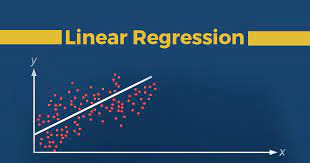

  linear regression is a linear approach to modelling the relationship 

---

between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression

In [ ]:
 #importing libraries
from sklearn.linear_model import LinearRegression
 
import sklearn.metrics as met
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
 #calling and fitting linear regression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
 # Finding the Evaluation Metrics
print ("training score: ",linear_reg.score(x_train,y_train)) 
MSE  = mean_squared_error(y_test,linear_reg.predict(x_test))
print("MSE :" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
 
 
r2 = r2_score(y_test,linear_reg.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,linear_reg.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.567328236725366
MSE : 185566.23005007528
RMSE : 430.7739895235961
R2 : 0.5566159744557897
Adjusted R2 :  0.5491489960929662


 **OBSERVATION:** 
*   We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general
 
*   We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.
 
*   After trying combinations of features with linear regression the model underfitted. It seemed obvious because data is spread too much. It didn't seem practical to fit a line.
 
*  Our train score came out to be 0.56 and test score came out to be 0.55.

##Ridge and Lasso Model

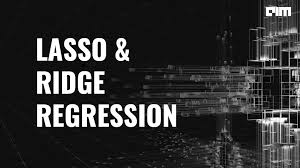

  Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression. Ridge Regression : In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

In [ ]:
 #importing library
from sklearn.linear_model import Ridge

In [ ]:
 rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(x_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(x_train, y_train)
 
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)

In [ ]:
print ("training score for alpha=0.01:",Ridge_train_score) 
print ("test score for alpha =0.01: ",Ridge_test_score)
print ("training score for alpha=100:",Ridge_train_score100) 
print ("test score for alpha =100: ", Ridge_test_score100)

training score for alpha=0.01: 0.5673282366715434
test score for alpha =0.01:  0.5566160724037408
training score for alpha=100: 0.5641001675109572
test score for alpha =100:  0.5535549318198828


In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test,rr.predict(x_test))
print("MSE for alpha =0.01 :" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE for alpha =0.01 :" ,RMSE)
 
 
r2 = r2_score(y_test,rr.predict(x_test))
print("R2 for alpha =0.01:" ,r2)
print("Adjusted R2 for alpha =0.01 : ",1-(1-r2_score(y_test,rr.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE for alpha =0.01 : 185566.18905664523
RMSE for alpha =0.01 : 430.7739419424592
R2 for alpha =0.01: 0.5566160724037408
Adjusted R2 for alpha =0.01 :  0.5491490956904472


 **OBSERVATION:**  
*  Here with ridge the train score for alpha=0.01 came to be 0.56 and the test score for alpha=0.01 came to be 0.55.
 
*  With ridge the train score for alpha=100 came to be 0.56 and the test score for alpha=100 came to be 0.55.
 
*  For both alpha 0.01 and 100 the train and test value came to be 0.56 and 0.55 respectively.

In [ ]:
 #importing library
from sklearn.linear_model import Lasso

In [ ]:
 #using lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print( "training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
#taking alpha=0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
#taking alpha=0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.566824173894794
test score:  0.5555759052833706
number of features used:  26
training score for alpha=0.01: 0.5673281696898199
test score for alpha =0.01:  0.5566131646487342
number of features used: for alpha =0.01: 28
training score for alpha=0.0001: 0.567328236718665
test score for alpha =0.0001:  0.5566159470250589
number of features used: for alpha =0.0001: 28


In [ ]:
 # Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test,lasso001.predict(x_test))
print("MSE for alpha=0.01 :" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE for alpha-0.01 :" ,RMSE)
 
print ("training score: ",lasso001.score(x_train,y_train)) 
 
r2 = r2_score(y_test,lasso001.predict(x_test))
print("R2 for lasso:" ,r2)
print("Adjusted R2 for alpha=0.01: ",1-(1-r2_score(y_test,lasso001.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE for alpha=0.01 : 185567.40601779716
RMSE for alpha-0.01 : 430.77535446888925
training score:  0.5673281696898199
R2 for lasso: 0.5566131646487342
Adjusted R2 for alpha=0.01:  0.5491461389662797


In [ ]:
 # Finding the Evaluation Metrics
print ("training score: ",lasso00001.score(x_train,y_train)) 
MSE  = mean_squared_error(y_test,lasso00001.predict(x_test))
print("MSE for alpha=0.0001 :" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE for alpha-0.0001 :" ,RMSE)
 
 
r2 = r2_score(y_test,lasso00001.predict(x_test))
print("R2 for lasso:" ,r2)
print("Adjusted R2 for alpha=0.0001: ",1-(1-r2_score(y_test,lasso00001.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.567328236718665
MSE for alpha=0.0001 : 185566.2415304557
RMSE for alpha-0.0001 : 430.77400284889023
R2 for lasso: 0.5566159470250589
Adjusted R2 for alpha=0.0001:  0.5491489682002777


 **OBSERVATION:**  
*  Here with lasso training score came to be 0.56 and test score came to be 0.55.
 
*  Number of features used is 26.
 
*  Training score for alpha=0.01 came to be 0.56 and
test score for alpha =0.01 came to be 0.55.
 
*  Number of features used: for alpha =0.01 is 28.
 
*  Training score for alpha=0.0001 came out to be 0.56 and test score for alpha =0.0001 came to be 0.55.
 
*  Number of features used: for alpha =0.0001 is 28.

##**Decision tree regressor model**

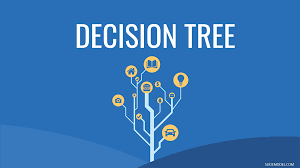

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [ ]:
#importing library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#calling decision tree regressor
reg_decision_model=DecisionTreeRegressor()

In [ ]:
# fit independent varaibles to the dependent variables
reg_decision_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Finding the Evaluation Metrics
print ("training score: ",reg_decision_model.score(x_train,y_train)) 
MSE  = mean_squared_error(y_test,reg_decision_model.predict(x_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,reg_decision_model.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,reg_decision_model.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  1.0
MSE : 74295.22146118722
RMSE : 272.5714978885122
R2 : 0.8224821705906805
Adjusted R2 :  0.8194926136494086


##**Doing hyperparameter tuning**

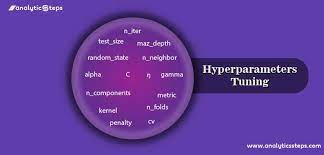

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [ ]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#taking min leaf sample from 1 to 50
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(x_train,y_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(y_train,DT_reg.predict(x_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(y_test,DT_reg.predict(x_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(y_test,DT_reg.predict(x_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(y_test,DT_reg.predict(x_test))}")


R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.8228087147239258
Mean absolute error on test dataset when min leaf 1: 152.22659817351598
Mean squared error on test dataset when min leaf 1: 74158.55536529681

R-sqared on train dataset when min leaf 2 : 0.9870158680250467
R-sqared on test dataset when min leaf 2: 0.823706839248578
Mean absolute error on test dataset when min leaf 2: 152.2286910197869
Mean squared error on test dataset when min leaf 2: 73782.66996448503

R-sqared on train dataset when min leaf 3 : 0.97345840488885
R-sqared on test dataset when min leaf 3: 0.8311621606624047
Mean absolute error on test dataset when min leaf 3: 150.98960235920853
Mean squared error on test dataset when min leaf 3: 70662.4495486111

R-sqared on train dataset when min leaf 4 : 0.9587647139947337
R-sqared on test dataset when min leaf 4: 0.8319486192868625
Mean absolute error on test dataset when min leaf 4: 151.88546830832792
Mean squared error on 

**OBSERVATION:**

*   As expected Decision tree has overfitted the data.
*   But it is doing way better than linear regression on test data as well. 
*   At minimum Sample leaf 5 the model giving highest r-squared score and least errors on test.

In [ ]:
#calling decision tree regresor
DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=6)
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', min_samples_leaf=6)

In [ ]:
# Finding the Evaluation Metrics
print ("training score: ",DT_reg.score(x_train,y_train)) 
MSE  = mean_squared_error(y_test,DT_reg.predict(x_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,DT_reg.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,DT_reg.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.9398741481529467
MSE : 64033.446254350805
RMSE : 253.04830814362464
R2 : 0.8470012180445685
Adjusted R2 :  0.8444245835052494


**OBSERVATION:** With Decision tree we reached at the model r squared value of 0.84. We only fitted with minimum number of leaf hyperparameter. With default paremeters it overfitted and reached r-squared at 1 with train dataset but 0.84 with test.

##**Feature Importance: Decision Tree**

In [ ]:
#creating dataframe
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

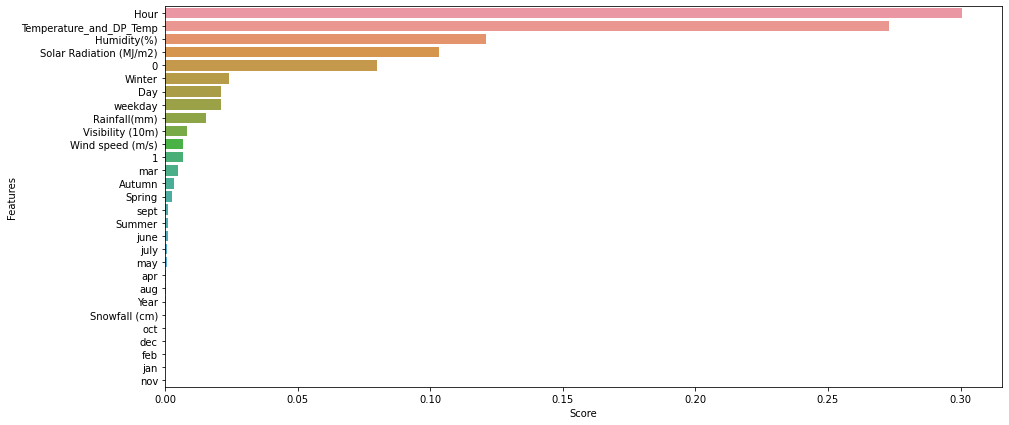

In [ ]:
#plotting graph
plt.figure(figsize=(15,7))
sns.barplot(x=features['Score'],y=features['Features'])
plt.show()

**OBSERVATION:** 
HOUR and TEMPERATURE_AND_DP_TEMPERATURE column are the main columns helping in prediction.

##**Random Forest Model**

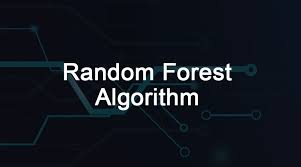


The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [50,60,60],
    'min_samples_split': [50,100,150],
    'n_estimators': [200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 200}

In [ ]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 50,
 min_samples_split= 100,
 n_estimators= 300 )
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=50,
                      min_samples_split=100, n_estimators=300)

In [ ]:
# Finding the Evaluation Metrics
print ("training score: ",rf.score(x_train,y_train)) 
MSE  = mean_squared_error(y_test,rf.predict(x_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,rf.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,rf.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.6699436830277031
MSE : 147734.92505638054
RMSE : 384.3630120815224
R2 : 0.6470084790357917
Adjusted R2 :  0.6410637902390658


**OBSERVATION:** 
*  Here with random forest r2 score came to be 0.67 on training and 0.65 on test set.

##**Gredient Boost model**

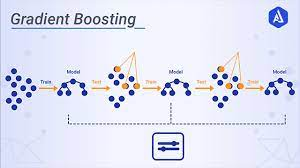

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [ ]:
#importing libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

##**Doing hyperparameter tuning**

In [ ]:
#number of trees
n_estimators = [100,120,150,180,200]

#Maximum depth of tree
max_depth = [6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
#calling gradient boost
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   2.2s
[CV] END max_depth=

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 120, 150, 180, 200]},
             verbose=2)

In [ ]:
#getting best parameters
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
#fitting model
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 10,
 min_samples_leaf= 40,
 min_samples_split = 50,
 n_estimators = 200)
gb_boost_with_best_perams.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=200)

In [ ]:
# Finding the Evaluation Metrics
print ("training score: ",gb_boost_with_best_perams.score(x_train,y_train))
MSE  = mean_squared_error(y_test,gb_boost_with_best_perams.predict(x_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,gb_boost_with_best_perams.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,gb_boost_with_best_perams.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.9784359305589931
MSE : 31072.101165559758
RMSE : 176.27280324984838
R2 : 0.9257576483976361
Adjusted R2 :  0.9245073416633338


**OBSERVATION:**  Gredient boost came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. By increasing the number of trees we could overfit it to 1 r squared accuracy. But it was plausible results of training r-square at 0.97 and test r-square value at 0.92.

##**Feature Importance: Gradient Boost**

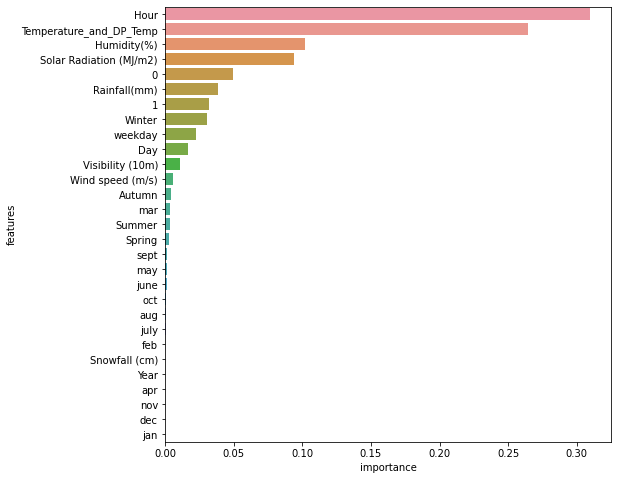

In [ ]:
#plotting graph
plt.figure(figsize=(8,8))
features_importance_gb = pd.DataFrame({'features':x_train.columns,'importance' : gb_boost_with_best_perams.feature_importances_})
features_importance_gb.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(features_importance_gb['importance'],features_importance_gb['features'])


**OBSERVATION:**

*   Feature importance graph is about same in Decision tree and gredient boost ensembling.

*    Error Rates were very high in other models. Gredient boost trains ensembles on errors rates so, it has better scores.

##**XGBoost regressor model**

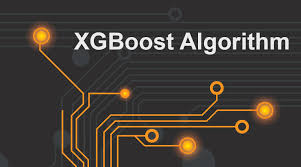

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [ ]:
#importing libraries
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,5,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv =3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9176879773465568
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
#calling XGBoost
model=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective='reg:linear', silent=1, subsample=0.7)
model.fit(x_train,
         y_train)

In [ ]:
# Finding the Evaluation Metrics
print ("training score: ",model.score(x_train,y_train))
MSE  = mean_squared_error(y_test,model.predict(x_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,model.predict(x_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,model.predict(x_test) ))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

training score:  0.9911296518223859
MSE : 30076.949464411897
RMSE : 173.42707246682076
R2 : 0.9281354213747723
Adjusted R2 :  0.9269251584362522
training score:  0.9911296518223859
MSE : 30076.949464411897
RMSE : 173.42707246682076
R2 : 0.9281354213747723
Adjusted R2 :  0.9269251584362522


**OBSERVATION:** with XGBoost Regressor we can see the r2 score on training data came to be 0.99 and on test data it is 0.92 which is quite good. 

In [ ]:
evaluation_dict={'Model_Name':['Linear Regression','Ridge Regresion','Lasso Regression','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
                 
                 'Train score':[ 0.5673282367253665,0.5673282366715409,0.5668241738947934,0.9398741481529467,0.676649212969302, 0.9784359305589931,0.9911296518223859],
               
                 'MSE':[185566.23005007548,186847.34553742415,185567.40601779716, 64046.28495208853, 142709.4945123191,31071.8606882133,30076.949464411897],
                
                 'R-squared':[0.5566159744557893,0.5566160724037408,0.5566159470250589,0.8261546182088159,0.6590160281686136,0.9257617085354451,0.9281354213747723], 
                }
evaluation_df=pd.DataFrame(evaluation_dict)
evaluation_df

,Model_Name,Train score,MSE,R-squared
0,Linear Regression,0.567328,185566.230050,0.556616
1,Ridge Regresion,0.567328,186847.345537,0.556616
2,Lasso Regression,0.566824,185567.406018,0.556616
3,Decision Tree,0.939874,64046.284952,0.826155
4,Random Forest,0.676649,142709.494512,0.659016
5,Gradient Boosting,0.978436,31071.860688,0.925762
6,XGBoost,0.991130,30076.949464,0.928135


##**Above are the Mean squared Error and R square score of all the Models.**

##**CONCLUSION :**

*  As it was stated in the problem statement, the business just started out in 2017. So the number of bikes rented in 2017 were too small.

*  We can see in year 2018 the rented bike count was 5986984 which is greater than 2017.

*  We can see in 6th month or in june the rented bike count is 706728 which is highest and in 2nd month or in feb the count was lowest which is 264112.

*  We can see the rented bike count is highest on 6th day of the month which is 371295 and lowest on 2nd day of the month which is 53694.

*  We can see on 4th day of week the rented bike count is 928267 which is highest.

*  There's is a whooping increase in number of bike rents in year 2018.
In the last month the demand decreases in 2018 but increases in it seen to be increasing in the end of 2017.
It is like this because, in 2017 the demand is taking off and we can see the pattern as it is still inceasing in the beginning months of 2018.
There is a decline in the end of the year. This could be repercussions of winter season as well.

*  With pie and bar plot we can say in summer the rented bike count was high as compared to other seasons and lowest in winter season.This is because when temperature decreases amount of snowfall increases due to which people avoid getting out that is the reason in summer rented bike count increases.

*  An ironic insight, all the holidays are falling on the functioning Days.

*  We can say on no holiday the rented bike count is much more high than on holiday.

*  With the graph we can say on 18th hour of the day there is a huge spike in the count of rented bike which is approx. 1600

*  People prefer to take bike ride more often when the temperature is near about 25 degrees Celcius. we can easliy conclude that the people gave more preference to bike riding in summers as compared to other seasons.

*  The rise in demand started from the end of 2017 that too in the winter season of the year. The observer may find it weird because demand decreased in the end of 2018. Actually for this situation it can be said that, as the business grew to april 2018 it had increased exponentially as compared to 2017. So, we can say that in winter 2017 demand increased but it wasn't still upto the mark of it's full potential. With simple heuristics for future as well if everything else in independent variables remains constant we can say that, the demand will decrease in december but with the proportionate to the overall demand of that year.

*  The number of business hours of the day and the demand for rented bikes were most correlated. It's common sense too.

*  Highest number of bike rented at the 18th hour of day.

*  After trying combinations of features with linear regression the model underfitted. It seemed obvious because data is spread too much. It didn't seem practical to fit a line.

*  With this pair plot we can seee there is no relation between independent variable and dependent variables, so our linear regression model will not work well on this data.

*  With ridge the train score for alpha=0.01 came to be 0.56 and the test score for alpha=0.01 came to be 0.55. train score for alpha=100 came to be 0.56 and the test score for alpha=100 came to be 0.55. for both alpha 0.01 and 100 the train and test value came to be 0.56 and 0.55 respectively.

*  With lasso training score came to be 0.56 and test score came to be 0.55.
number of features used is 26. training score for alpha=0.01 came to be 0.56 and
test score for alpha =0.01 came to be 0.55. number of features used: for alpha =0.01 is 28. training score for alpha=0.0001 came out to be 0.56 and test score for alpha =0.0001 came to be 0.55. number of features used: for alpha =0.0001 is 28.

*  With Decision tree we reached at the model r squared value of 0.84. We only fitted with minimum number of leaf hyperparameter. With default paremeters it overfitted and reached r-squared at 1 with train dataset but 0.83 with test.

*  With random forest our r2 score came out to be 0.67 on training set and 0.64 on test set.

*  Gredient boost came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. By increasing the number of trees we could overfit it to 1 r squared accuracy. But it was plausible results of training r-square at 0.97 and test r-square value at 92 also with adjusted r-square with 0.92.

*  The Feature_importance was almost the same in both the tree based models. Gredient boost fine-tunes with error of the prior trees this is why it gets better accuracies.

*  HOUR and TEMPERATURE_AND_DP_TEMPERATURE column are the main columns helping in prediction.

*  With XGBoost Regressor we can see the r2 score on training data came to be 0.99 and on test data it is 0.92 which is quit good. 







#  **SUMMARY**: 

Firstly we've done some exploratory data analysis then we pre-processed the data, we encoded the categorical columns 'Seasons', 'Functional day' and 'Holiday' into Numerical columns.

Then we splitted dataset into training and testing set, after splitting we fitted Linear Regression but the score was quite low as there was no linearity between dependent and independent variables. then we tried to regularize the data with Lasso and Ridge Regression but still we did not reached to that point because the model complexity was low, we got the test score of 0.55 for both lasso and ridge regression.

Then we tried fitting Tree based algorithm i.e. Decision tree and Random forest and we got the score of 0.83 and 0.64 respectively. Decision Tree Regressor performed well.

Gredient boost came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. By increasing the number of trees we could overfit it to 1 r squared accuracy. But it was plausible results of training r square at 0.97 and test r square value at 0.92.

The Feature importance was almost the same in both the tree based models. Gredient boost fine tunes with error of the prior trees this is why it gets better accuracies.

With XGBoost Regressor we can see the r square score on training data came to be 0.99 and on test data it is 0.92 which is quit good.

So finally after looking at all the model scores we can conclude that gradient boosting and XGBoost are the best model for further use.

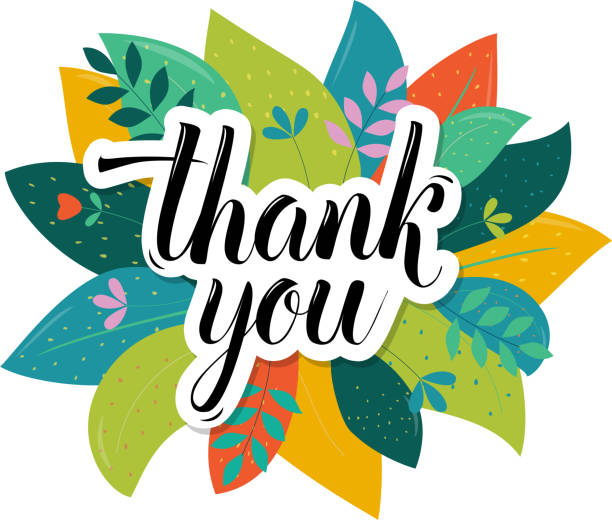